In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision.io import read_image, ImageReadMode
from torch.utils.data import Dataset, DataLoader
import cv2
import os
import time
from copy import deepcopy
import matplotlib.pyplot as plt
import os

from utils import *
from PATH import *
from data import *
from train import *

In [2]:
DATA_PATH, TRAIN_PATH

('/home/ruohuali/Desktop/depth-estimation/DIODE_selection',
 '/home/ruohuali/Desktop/depth-estimation/DIODE_selection/scan_00199')

In [3]:
# depth_mat = np.load(os.path.join(TRAIN_PATH, "00023_00199_outdoor_000_020_depth.npy"))
# depth_mat = depth_mat.squeeze()

# drawHeatmap(depth_mat, max_display=1000)
# img = cv2.imread(os.path.join(TRAIN_PATH, "00023_00199_outdoor_000_020.png"))
# plt.figure()
# plt.imshow(img)

# vals = np.unique(depth_mat)
# print(vals.shape, np.max(vals), np.min(vals))

In [4]:
names = os.listdir(TRAIN_PATH)
names = sorted(names)

prefix = []
for name in names:
    if name.endswith(".png"):
        prefix.append(name.rstrip(".png"))
# prefix

data torch.Size([3, 320, 320]) torch.Size([1, 320, 320]) (768, 1024, 3) (768, 1024)


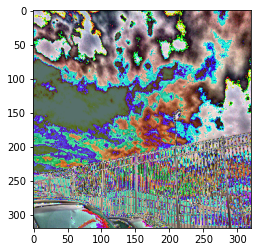

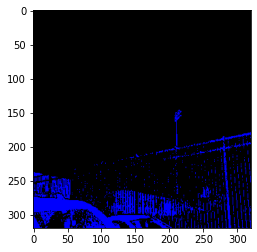

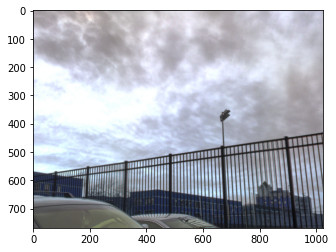

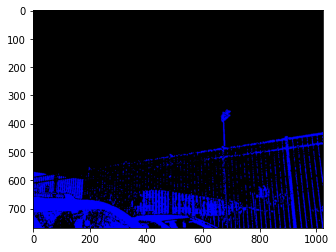

In [5]:
diode = DIODE(TRAIN_PATHS, original=True)
diode.example()

In [6]:
model_device = torch.device("cuda")   
data_device = device = torch.device("cpu")       

transform = transforms.Compose([transforms.Resize( (320, 320) ),
                                        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
target_transform = transforms.Compose([transforms.Resize( (320, 320) )])

dataset = DIODE(TRAIN_PATHS, transform=transform, target_transform=target_transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=0)

unet = RegUNet(3, 32).to(model_device)
model = train(unet, dataloader, True, device=model_device)
testViz(model, transform)

RuntimeError: CUDA out of memory. Tried to allocate 400.00 MiB (GPU 0; 1.95 GiB total capacity; 544.31 MiB already allocated; 92.38 MiB free; 576.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF